Non-parametric Tests
- Chi square test of goodness of fit
- Mann Whitney U test : Independent samples
- Wilcoxon signed rank test : Dependent samples

Goodness of fit Test

- The χ2 distribution is used for testing the goodness of fit of a set of data to a specific probability distribution
- Expected distribution is the distribution used according to the data distribution .
- Expected probabilities are the probability we arrive after using the expected

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='Goodness').iloc[:,0:2]
df

,#calls per Minute,Frequency
0,0,4
1,1,15
2,2,42
3,3,60
4,4,89
5,5,94
6,6,52
7,7 or more,80


In [3]:
#Actual and Expected frequencies

In [4]:
#CHi square test of assocition: Expected frequency = (row sum* column sum)/total

In [5]:
#Chi square test of goodness of fit: Expected frequency = N * p(x)

In [6]:
#H0: Data follows poisson distribution
#H1: Data doesn't follow poisson distribution

In [8]:
N=df['Frequency'].sum()
N

436

In [9]:
#To apply possion distribution we need average rate which is 5 here.
from scipy.stats import poisson
prob=[]
for i in range(0,7):
    p=poisson.pmf(i,5)
    prob.append(p)

In [11]:
prob=prob+[1-poisson.cdf(6,5)]
prob

[0.006737946999085467,
 0.03368973499542734,
 0.08422433748856832,
 0.1403738958142805,
 0.17546736976785063,
 0.17546736976785068,
 0.1462228081398754,
 0.2378165370270613]

In [13]:
df['p']=prob
df['Exp']=N*df['p']

In [14]:
df

,#calls per Minute,Frequency,p,Exp
0,0,4,0.006738,2.937745
1,1,15,0.033690,14.688724
2,2,42,0.084224,36.721811
3,3,60,0.140374,61.203019
4,4,89,0.175467,76.503773
5,5,94,0.175467,76.503773
6,6,52,0.146223,63.753144
7,7 or more,80,0.237817,103.688010


In [15]:
from scipy.stats import chisquare
chisquare(df['Frequency'],df['Exp'])

Power_divergenceResult(statistic=14.793869789717073, pvalue=0.03873436246998954)

In [16]:
# p value 0.039 < alpha=0.05

In [17]:
# u stat < u crit then reject
# u stat > u crit then accept

In [20]:
mw=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='Mann').iloc[:,0:2]
mw=mw.dropna()
mw

,Rating X,Rating Y
0,3.0,9.0
1,4.0,7.0
2,2.0,5.0
3,6.0,10.0
4,2.0,6.0
5,5.0,8.0


In [21]:
from scipy.stats import mannwhitneyu
mannwhitneyu(mw['Rating X'],mw['Rating Y'])

MannwhitneyuResult(statistic=2.0, pvalue=0.006295955745189842)

In [ ]:
#u stat < u cric then reject.

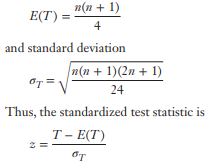

In [22]:
from IPython.display import Image
Image(filename='wsrt.png')

In [25]:
wc=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='wsrt')

In [29]:
wc['diff']=wc['Before']-wc['After']
wc['rank']=np.abs(wc['diff']).rank()
wc

,Before,After,diff,rank
0,5.0,7.8,-2.8,2.0
1,10.0,180.0,-170.0,11.0
2,18.0,10.0,8.0,5.0
3,5.0,80.0,-75.0,10.0
4,10.0,15.0,-5.0,3.5
5,20.0,10.0,10.0,6.0
6,5.0,180.0,-175.0,12.0
7,2.5,40.0,-37.5,8.0
8,15.0,10.0,5.0,3.5
9,10.0,7.5,2.5,1.0


In [33]:
#Sum of positive ranks: Get differences which are positive and get corresponding ranks and sum it
T= wc[wc['diff']>0]['rank'].sum()
T

24.5

In [30]:
et=12*(13)/4
et

39.0

In [31]:
std_t=np.sqrt(12*13*(2*12+1)/24)
std_t

12.747548783981962

In [34]:
z=(T-et)/std_t
z

-1.1374735838014673

In [39]:
from scipy.stats import norm
norm.cdf(z) #One tailed prob

0.1276701807669502

In [37]:
from scipy.stats import wilcoxon
wilcoxon(wc['Before'],wc['After']) #two tailed

WilcoxonResult(statistic=24.5, pvalue=0.25515751134134046)

In [42]:
#Exercise
df=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='Exercise 2').iloc[:,0]

In [46]:
#Observed frequencies
obs=df.value_counts().sort_index()
obs

1    11
2    32
3    62
4    29
5    16
Name: Grades, dtype: int64

In [47]:
df=pd.DataFrame()

In [49]:
df['obs']=obs
df['p']=[0.05,0.25,0.4,0.25,0.05]
df['exp']=df['obs'].sum()*df['p']
df

,obs,p,exp
1,11,0.05,7.5
2,32,0.25,37.5
3,62,0.40,60.0
4,29,0.25,37.5
5,16,0.05,7.5


In [50]:
chisquare(df['obs'],df['exp'])

Power_divergenceResult(statistic=14.066666666666666, pvalue=0.007085294914548832)

In [ ]:
#Null: Data follows symmetric distribution
#Alter: Data doesn't follow symmetric distribution